### LINK STATE ROUTING - DIJIKSTRA'S ALGORITHM

In [1]:
!pip install pandas

You should consider upgrading via the 'c:\users\prashanth\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
from pandas import DataFrame

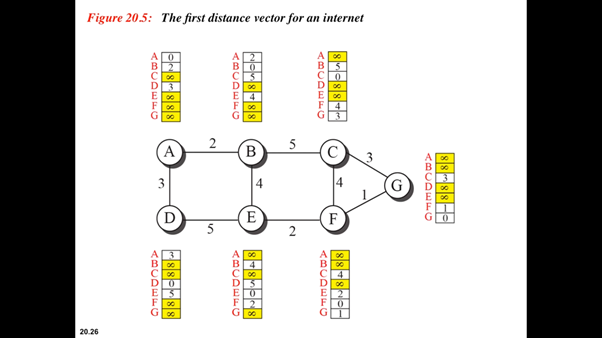

In [ ]:
graph = {'A':{'B':2,'D':3},
         'B':{'A':2,'E':4,'C':5},
         'C':{'B':5,'F':4,'G':3},
         'D':{'A':3,'E':5},
         'E':{'B':4,'D':5,'F':2},
         'F':{'C':4,'G':1},
         'G':{'C':3,'F':1},
        }

nodes = list(graph.keys())
RoutingTable = []

for p,q in enumerate(nodes):

    visited = []
    unvisited = nodes.copy()
    next_node = len(nodes)*['']

    inf = float('inf')
    shortest_distance = len(nodes)*[inf]

    root_node = q
    current_node = q
    shortest_distance[ord(current_node)-65] = 0

    while True:
        for i in list(graph[current_node].keys()):
            if i not in visited:
                if shortest_distance[ord(current_node)-65]+graph[current_node][i] < shortest_distance[ord(i)-65]:
                    shortest_distance[ord(i)-65] = shortest_distance[ord(current_node)-65]+graph[current_node][i]
                    if current_node != root_node:
                        next_node[ord(i)-65] = current_node

        visited.append(current_node)
        unvisited.remove(current_node)

        if len(unvisited) == 0:
            break

        unvstd_aasci = [ord(x) for x in unvisited]
        min_value = min([shortest_distance[j-65] for j in unvstd_aasci])
        min_index = [j for j,x in enumerate(shortest_distance) if x == min_value]
        for j in min_index:
            if chr(65+j) in unvisited:
                current_node = chr(65+j)
                break

    for i in range(len(next_node)):
        if next_node[i] == root_node:
            next_node[i] = ''

    RoutingTable.append(DataFrame({'To':list(graph.keys()),'Cost':shortest_distance,'Next':next_node}))
    
    print(f"\n\nRouting table for {root_node}")
    display(RoutingTable[-1])

print(f"\n\nAvailable nodes ==> {nodes}")


start = input("\nEnter the start node : ")
while start not in nodes:
    print("Invalid Node....Try again")
    start = input("Enter the start node : ")
    
    
dest  = input("\nEnter the Destination node : ")
while dest not in nodes:
    print("Invalid Node....Try again")
    dest = input("Enter the Destination node : ")

    
index = ord(start)-65
df = RoutingTable[index]
path = []
path.append(start)
temp = dest
while df[df['To'] == temp]['Next'].values[0] != '':
    path.insert(1,df[df['To'] == temp]['Next'].values[0])
    temp = df[df['To'] == temp]['Next'].values[0]
    
print("\nOptimal path : ",end ="")
for i in range(len(path)):
    print(path[i],end = " ==> ")
print(dest)



Routing table for A


,To,Cost,Next
0,A,0,
1,B,2,
2,C,7,B
3,D,3,
4,E,6,B
5,F,8,E
6,G,9,F




Routing table for B


,To,Cost,Next
0,A,2,
1,B,0,
2,C,5,
3,D,5,A
4,E,4,
5,F,6,E
6,G,7,F




Routing table for C


,To,Cost,Next
0,A,7,B
1,B,5,
2,C,0,
3,D,10,A
4,E,9,B
5,F,4,
6,G,3,




Routing table for D


,To,Cost,Next
0,A,3,
1,B,5,A
2,C,10,B
3,D,0,
4,E,5,
5,F,7,E
6,G,8,F




Routing table for E


,To,Cost,Next
0,A,6,B
1,B,4,
2,C,6,F
3,D,5,
4,E,0,
5,F,2,
6,G,3,F




Routing table for F


,To,Cost,Next
0,A,11,B
1,B,9,C
2,C,4,
3,D,14,A
4,E,13,B
5,F,0,
6,G,1,




Routing table for G


,To,Cost,Next
0,A,10,B
1,B,8,C
2,C,3,
3,D,13,A
4,E,12,B
5,F,1,
6,G,0,




Available nodes ==> ['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [ ]:
sh